In [1]:
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

torch.manual_seed(10)

In [2]:
#linear function parameters
weight = 0.7
bias   = 0.3

#creation of datas
start = 0
end   = 1
step  = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
split_len = int(0.8 * len(x))

x_train , y_train = x[:split_len], y[:split_len]
x_test  , y_test  = x[split_len:], y[split_len:]

In [3]:
def plot_predictions(train_data   = x_train,
                     train_labels = y_train,
                     test_data    = x_test,
                     test_labels  = y_test,
                     predictions  = None):
    
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions.detach().numpy(), c="r", label="Predictions")

    plt.legend(prop={"size" : 14})

In [4]:
#cretation of linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype = torch.float, requires_grad=True))
        self.bias    = nn.Parameter(torch.randn(1,dtype = torch.float, requires_grad=True))
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [5]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True),
 Parameter containing:
 tensor([-1.0122], requires_grad=True)]

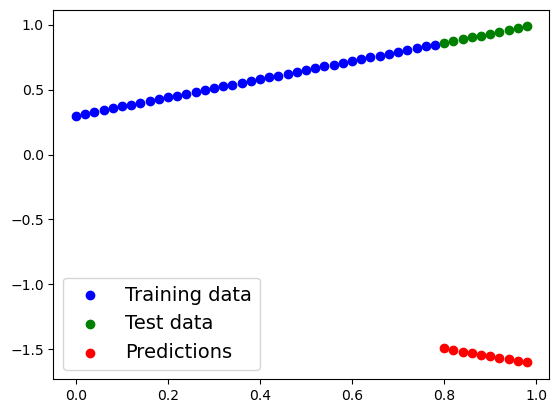

In [6]:
#making predictions
with torch.inference_mode():
    y_pred = model_0(x_test)

plot_predictions(predictions=y_pred)

In [7]:
#creating the loss function
loss_func = nn.L1Loss()
optimizer = optim.SGD(params = model_0.parameters(),
                      lr = 0.01)

In [8]:
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    
    #setting the training mode
    model_0.train()
    
    #making preditction
    y_pred = model_0(x_train)
    
    #calculating the loss value
    loss = loss_func(y_pred, y_train)
    
    #setting the gradient to zero 
    optimizer.zero_grad()
    
    #computing the gradient
    loss.backward()
    
    #setting the new parameters
    optimizer.step()
    
    #setting the evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        
        test_pred = model_0(x_test)
        
        test_loss = loss_func(test_pred, y_test.type(torch.float))
        
        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch:{epoch}| MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch:0| MAE Train Loss: 1.8197532892227173 | MAE Test Loss: 2.4569783210754395 
Epoch:10| MAE Train Loss: 1.704543113708496 | MAE Test Loss: 2.3222687244415283 
Epoch:20| MAE Train Loss: 1.589333176612854 | MAE Test Loss: 2.187558650970459 
Epoch:30| MAE Train Loss: 1.474123239517212 | MAE Test Loss: 2.052849054336548 
Epoch:40| MAE Train Loss: 1.358913540840149 | MAE Test Loss: 1.918139100074768 
Epoch:50| MAE Train Loss: 1.2437036037445068 | MAE Test Loss: 1.7834293842315674 
Epoch:60| MAE Train Loss: 1.1284937858581543 | MAE Test Loss: 1.6487194299697876 
Epoch:70| MAE Train Loss: 1.0132839679718018 | MAE Test Loss: 1.514009714126587 
Epoch:80| MAE Train Loss: 0.8980739712715149 | MAE Test Loss: 1.3792996406555176 
Epoch:90| MAE Train Loss: 0.782863974571228 | MAE Test Loss: 1.2445898056030273 
Epoch:100| MAE Train Loss: 0.6676539182662964 | MAE Test Loss: 1.109879732131958 
Epoch:110| MAE Train Loss: 0.5524438619613647 | MAE Test Loss: 0.9751695394515991 
Epoch:120| MAE Train Loss

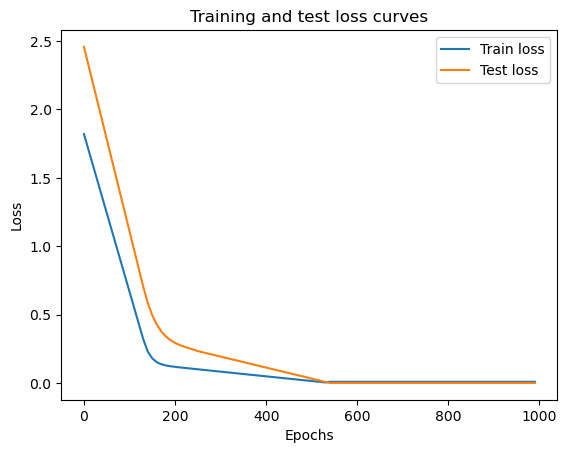

In [9]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Dictionary:OrderedDict([('weights', tensor([0.6903])), ('bias', tensor([0.2953]))])
Weight :0.7
Bias :0.3


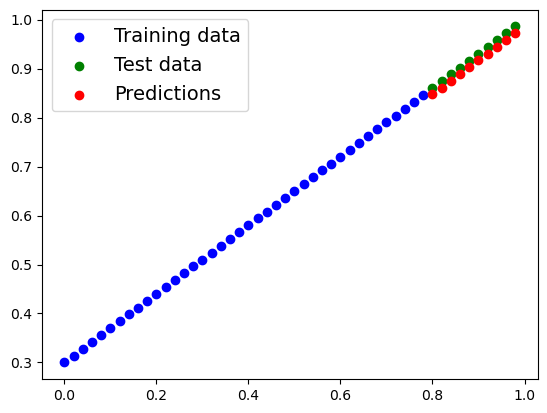

In [10]:
model_0.eval()

with torch.inference_mode():
    y_pred = model_0(x_test)

plot_predictions(predictions=y_pred)

print(f"Dictionary:{model_0.state_dict()}")
print(f"Weight :{weight}")
print(f"Bias :{bias}")


In [11]:
from pathlib import Path

# 1. Create directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Cretate a model name and save path
MODEL_NAME = "linear_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/linear_model.pth


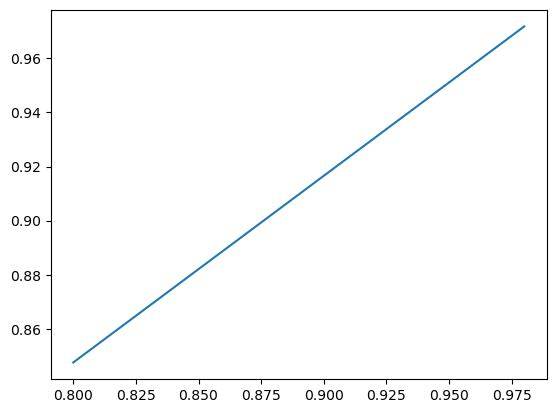

In [17]:
#Loading module
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()

with torch.inference_mode():
    loaded_pred = loaded_model_0(x_test)

plt.plot(x_test, loaded_pred)
plt.show()
